# 課題1: データ前処理の実習

本レッスンの 1.2 で触れたように、機械学習を実施するにあたり「データを作成（調整）」することは非常に重要です。予測の精度にも関わります。機械学習を始める前にデータを調整することを **前処理** と言います。データの前処理は、データ分析の全行程のうち約8割を占める重要な工程です。

ここではデータの前処理について理解いただくための課題を用意しました。この課題ではkaggleのcompetitionで使用されたデータを用いてデータの前処理方法を確認します。

各列の詳細は下記サイトをご参照ください。
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

各セルに入っているコメントの下に、実行するコードを記入してください。わからない場合は、ここまでのレッスン内容や各種ライブラリの公式ドキュメントを参照しましょう。

## 1. 必要なモジュールの読み込み

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

matplotlib.style.use('ggplot')

%matplotlib inline

## 2. データの読み込み

CSVファイル"kaggle_housing_price.csv"を読み込み、内容を確認します。

In [4]:
# データ読み込み
dataset = pd.read_csv("kaggle_housing_price.csv")

In [5]:
# データを最初の5行だけ表示
dataset.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


DataFrameの`shape` プロパティで全データの行数と列数を取得できます。

参照：http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.shape.html

In [6]:
# データの行数、列数を表示
dataset.shape

(1460, 81)

## 3. 要約統計量を出力する

データ数、平均や中央値、標準偏差などの統計量を確認し、データへの理解を深めます。

なお、DataFrameの `describe()` を使うと、様々な統計量の情報を要約として表示してくれます。

参考：http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.describe.html

In [7]:
# 要約統計量を表示
dataset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## 4. 基本的なデータの操作

データの抽出・列の分割について学びます。

### インデックスを用いた行の指定

In [8]:
# インデックス番号0~10の行を抽出
dataset.iloc[0:11,:]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [9]:
# "SalePrice"と"LotArea"の列を抽出し、最初の10行だけ表示
dataset.loc[0:10,["SalePrice","LotArea"]]

,SalePrice,LotArea
0,208500,8450
1,181500,9600
2,223500,11250
3,140000,9550
4,250000,14260
5,143000,14115
6,307000,10084
7,200000,10382
8,129900,6120
9,118000,7420


### カラム間の演算

PandasのDataFrameでは、列同士の四則演算、ならびに新しい列を追加することができます。

たとえば、`df` というDataFrameの変数があり、中に `a`,`b` というカラムが存在するとき、`df['c'] = df['a'] + df['b']` と記述することで、a列とb列の加算結果を c という新しい列として df に追加してくれます。

In [10]:
# "1stFlrSF"と"2ndFlrSF"を合計した"FlrSF_total"を新たな列として加える
dataset['FlrSF_total'] = dataset['1stFlrSF'] + dataset['2ndFlrSF']
dataset.iloc[0:11,:]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,FlrSF_total
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,1710
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,1262
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,1786
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,1717
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,2198
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000,1362
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2007,WD,Normal,307000,1694
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,Shed,350,11,2009,WD,Normal,200000,2090
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900,1774
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,1,2008,WD,Normal,118000,1077


 ### ダミー変数の作成
 
列 `SaleType` は `WD`, `New`, `COD` など、合わせて9種類の値しかありません。このようなデータをもつ列は一般的に **カテゴリ変数** と呼んでいます（Lesson6以降で改めて説明します）。カテゴリ変数のデータは、**ダミー変数** にしてあげましょう。たとえば `SaleType` ですと、

- `SaleType_WD`　：`SaleType` のデータが `WD` なら1、それ以外の場合は0が入る列
- `SaleType_New`　：`SaleType` のデータが `New` なら1、それ以外の場合は0が入る列
- `SaleType_COD`　：`SaleType` のデータが `COD` なら1、それ以外の場合は0が入る列

（以下省略）

このようにして、`SaleType` のデータの種類数に合わせて9個の新しい列を作成します。この9個の列には、1つが `1` で、残りは全て `0` が入っています。これがダミー変数です。

ダミー変数化するのに最も楽な方法は、Pandasの `get_dummies()` を使う方法です。

参考：http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.get_dummies.html

In [11]:
# 列'SaleType'をダミー変数に展開したものを変数 dataset に上書きします。
dataset = pd.get_dummies(dataset,columns=['SaleType'])

In [12]:
# ダミー変数が作成されていることを確認します　(datasetの最初の5行だけ出力)
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,FlrSF_total,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,1710,0,0,0,0,0,0,0,0,1
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,1262,0,0,0,0,0,0,0,0,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,1786,0,0,0,0,0,0,0,0,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,1717,0,0,0,0,0,0,0,0,1
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,2198,0,0,0,0,0,0,0,0,1


### フィルタリング

特定の条件の行のみ抽出することができます。そのために、DataFrameの `query()` を使います。括弧の中に条件式を記述してください。

たとえば、`LotArea` が `15000以上` という条件にするなら、`dataset.query('LotArea >= 15000')` です。最後に `.head()`を追記すれば、今までどおり5件だけの取得になります。

参考：http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.query.html

In [13]:
# 'YearBuilt'が2000以降の物件のみを抽出し、最初の5件のみ表示
pd.set_option('display.max_columns', 100)
dataset.query("YearBuilt >= 2000").head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,FlrSF_total,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,Normal,208500,1710,0,0,0,0,0,0,0,0,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,Normal,223500,1786,0,0,0,0,0,0,0,0,1
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,Normal,250000,2198,0,0,0,0,0,0,0,0,1
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,Normal,307000,1694,0,0,0,0,0,0,0,0,1
11,12,60,RL,85.0,11924,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2005,2006,Hip,CompShg,WdShing,Wd Shng,Stone,286.0,Ex,TA,PConc,Ex,TA,No,GLQ,998,Unf,0,177,1175,GasA,Ex,Y,SBrkr,1182,1142,0,2324,1,0,3,0,4,1,Ex,11,Typ,2,Gd,BuiltIn,2005.0,Fin,3,736,TA,TA,Y,147,21,0,0,0,0,NaN,NaN,NaN,0,7,2006,Partial,345000,2324,0,0,0,0,0,0,1,0,0


In [14]:
dataset.query("YearBuilt >= 2000").loc[:,["YearBuilt"]].head()

,YearBuilt
0,2003
2,2001
4,2000
6,2004
11,2005


`dataset.query('LotArea >= 15000 and MSSubClass >= 50')` のように複数の条件を指定することも可能です。

In [15]:
# 'YearBuilt'が2000以降、'GarageCars'が2以上の物件を抽出
dataset.query('YearBuilt >= 2000 and GarageCars >= 2')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,FlrSF_total,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,Normal,208500,1710,0,0,0,0,0,0,0,0,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,Normal,223500,1786,0,0,0,0,0,0,0,0,1
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,Normal,250000,2198,0,0,0,0,0,0,0,0,1
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,Normal,307000,1694,0,0,0,0,0,0,0,0,1
11,12,60,RL,85.0,11924,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2005,2006,Hip,CompShg,WdShing,Wd Shng,Stone,286.0,Ex,TA,PConc,Ex,TA,No,GLQ,998,Unf,0,177,1175,GasA,Ex,Y,SBrkr,1182,1142,0,2324,1,0,3,0,4,1,Ex,11,Typ,2,Gd,BuiltIn,2005.0,Fin,3,736,TA,TA,Y,147,21,0,0,0,0,NaN,NaN,NaN,0,7,2006,Partial,345000,2324,0,0,0,0,0,0,1,0,0
13,14,20,RL,91.0,10652,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,Stone,306.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1494,1494,GasA,Ex,Y,SBrkr,1494,0,0,1494,0,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,3,840,TA,TA,Y,160,33,0,0,0,0,NaN,NaN,NaN,0,8,2007,Partial,279500,1494,0,0,0,0,0,0,1,0,0
18,19,20,RL,66.0,13695,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,RRAe,Norm,1Fam,1Story,5,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,TA,TA,No,GLQ,646,Unf,0,468,1114,GasA,Ex,Y,SBrkr,1114,0,0,1114,1,0,1,1,3,1,Gd,6,Typ,0,NaN,Detchd,2004.0,Unf,2,576,TA,TA,Y,0,102,0,0,0,0,NaN,NaN,NaN,0,6,2008,Normal,159000,1114,0,0,0,0,0,0,0,0,1
20,21,60,RL,101.0,14215,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,2Story,8,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,380.0,Gd,TA,PConc,Ex,TA,Av,Unf,0,Unf,0,1158,1158,GasA,Ex,Y,SBrkr,1158,1218,0,2376,0,0,3,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2005.0,RFn,3,853,TA,TA,Y,240,154,0,0,0,0,NaN,NaN,NaN,0,11,2006,Partial,325300,2376,0,0,0,0,0,0,1,0,0
22,23,20,RL,75.0,9742,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2002,2002,Hip,CompShg,VinylSd,VinylSd,BrkFace,281.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1777,1777,GasA,Ex,Y,SBrkr,1795,0,0,1795,0,0,2

In [16]:
dataset.query('YearBuilt >= 2000 and GarageCars >= 2').loc[:,['YearBuilt','GarageCars']]

,YearBuilt,GarageCars
0,2003,2
2,2001,2
4,2000,3
6,2004,2
11,2005,3
13,2006,3
18,2004,2
20,2005,3
22,2002,2
25,2007,3


## 5. データの可視化

データを理解するには要約統計量や抽出したデータを確認するだけでは不十分であり、可視化が必要です。

### ヒストグラム

連続変数の分布を確認する際に有効です。DataFrameの `hist()` が使えます。

参考：http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.hist.html

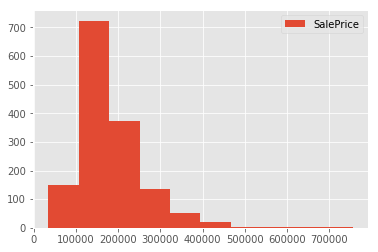

In [17]:
# datasetの'SalePrice'をヒストグラムで表示
plt.hist(dataset["SalePrice"], label="SalePrice")
plt.legend()

### 散布図

2つの変数の関係性を確認する際に有効です。DataFrameの `plot()` が使えます。

参考：http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.plot.html

Text(0,0.5,'SalePrice')

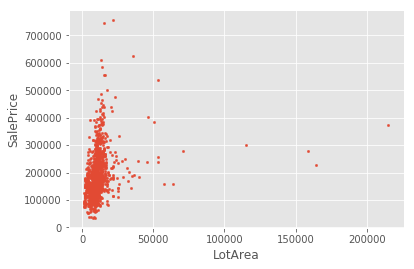

In [18]:
# datasetの'LotArea'と'SalePrice'を散布図で表示
plt.scatter(dataset["LotArea"],dataset["SalePrice"], s=5)
plt.xlabel("LotArea")
plt.ylabel("SalePrice")
#plt.grid(True)

### 棒グラフ

大小や増減を比較する際に有効です。DataFrameの `plot.bar()` が使えます。

参考：http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.plot.bar.html

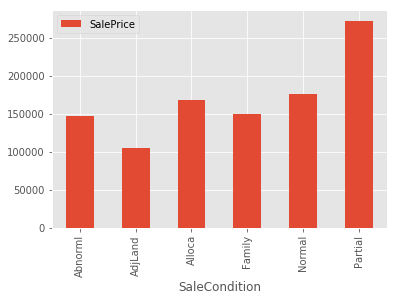

In [25]:
#'SalePrice'のSaleCondition毎の平均を変数　price_by_conditionに格納
price_by_condition = dataset.groupby('SaleCondition').mean()
price_by_condition = price_by_condition.loc[:,['SalePrice']]
# price_by_conditionが持つ、棒グラフを表示する命令を実行
price_by_condition.plot.bar()
#plt.bar(price_by_condition)

### 箱ヒゲ図 (Boxplot) 

複数の変数の分布を比較する際に有効です。 （棒グラフでは平均の比較はできますが、分布全体の比較はできません)

DataFrameの `boxplot()` が使えます。

参考：http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.boxplot.html

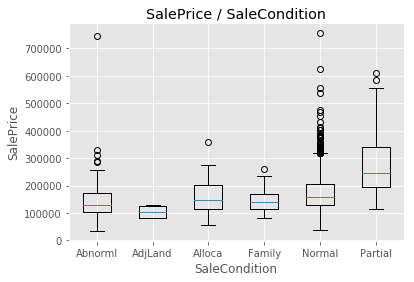

In [80]:
# datasetの'SaleCondition'ごとに'SalePrice'をboxplotで表示
Abnorml = dataset.query("SaleCondition == 'Abnorml'").loc[:,['SalePrice']].values
AdjLand = dataset.query("SaleCondition == 'AdjLand'").loc[:,['SalePrice']].values
Alloca = dataset.query("SaleCondition == 'Alloca'").loc[:,['SalePrice']].values
Family = dataset.query("SaleCondition == 'Family'").loc[:,['SalePrice']].values
Normal = dataset.query("SaleCondition == 'Normal'").loc[:,['SalePrice']].values
Partial = dataset.query("SaleCondition == 'Partial'").loc[:,['SalePrice']].values

points = (Abnorml,AdjLand,Alloca,Family,Normal,Partial)
# 箱ひげ図
fig, ax = plt.subplots()
bp = ax.boxplot(points)

SaleCondition = ("Abnorml","AdjLand","Alloca","Family","Normal","Partial")
ax.set_xticklabels(SaleCondition)

plt.title('SalePrice / SaleCondition')
plt.xlabel('SaleCondition')
plt.ylabel('SalePrice')
#plt.grid()

# 描画
plt.show()

## 6. 欠損値の確認

カリキュラムで利用した野球選手の年俸データは、きれいにしたデータでした。通常の集めたデータは、一部のデータが欠けていることがほとんどです。

欠けているデータを **欠損値** といいます。データに欠損値があると、演算でエラーが起きる場合があります。

欠損値の扱いは欠損が発生した原因により異なります。基本的には、精度に影響しないようなデータで埋めます。一例としては `0`、平均値や中央値などです。

ある列が欠損値を持っているかどうかは Pandas の `isnull()` でわかります。`pd.isnull(dataset['LotFrontage'])`　のように記述します。また、`.sum()` をつなげることで、その列で欠損値を持つ行数がわかります。

参考：http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.isnull.html

In [74]:
# 列ごとに欠損値の有無を確認
dataset.isnull().sum()

Id                   0
MSSubClass           0
MSZoning             0
LotFrontage        259
LotArea              0
Street               0
Alley             1369
LotShape             0
LandContour          0
Utilities            0
LotConfig            0
LandSlope            0
Neighborhood         0
Condition1           0
Condition2           0
BldgType             0
HouseStyle           0
OverallQual          0
OverallCond          0
YearBuilt            0
YearRemodAdd         0
RoofStyle            0
RoofMatl             0
Exterior1st          0
Exterior2nd          0
MasVnrType           8
MasVnrArea           8
ExterQual            0
ExterCond            0
Foundation           0
                  ... 
GarageFinish        81
GarageCars           0
GarageArea           0
GarageQual          81
GarageCond          81
PavedDrive           0
WoodDeckSF           0
OpenPorchSF          0
EnclosedPorch        0
3SsnPorch            0
ScreenPorch          0
PoolArea             0
PoolQC     

In [78]:
dataset = dataset.fillna('0')
dataset.isnull().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea           0
Street            0
Alley             0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        0
MasVnrArea        0
ExterQual         0
ExterCond         0
Foundation        0
                 ..
GarageFinish      0
GarageCars        0
GarageArea        0
GarageQual        0
GarageCond        0
PavedDrive        0
WoodDeckSF        0
OpenPorchSF       0
EnclosedPorch     0
3SsnPorch         0
ScreenPorch       0
PoolArea          0
PoolQC            0
Fence             0
MiscFeature       0
MiscVal           0
MoSold            0
YrSold            0
SaleCondition     0
